#### **Movies Analysis**

**Project Overview**

**Objective :** \
Analyze movies ever filmed worldwide across various dimensions like movie name, companies, budget, revenue, ratings, genre and trends. 

**Dataset Source :** \
*Alex the Analyst's Github page*

**Goal :** \
Provide actionable insights about genres, companies, ratings and other key attributes influencing revenues.

##### Import Libraries

In [4]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization style libraries
import matplotlib
custom = {
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.figsize': (10,8),
    'axes.labelsize': 14,
    'axes.titlesize': 16
}
matplotlib.rcParams.update(custom)
import plotly.express as px

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

##### Data Collection

Loading Dataset

The dataset is loaded from a CSV file. \
It contains details such as movie name, genre, budget, gross revenue, and ratings.

In [5]:
# Load csv files from local machine

df = pd.read_csv(r'C:\Users\wareh\Documents\VS Code Folders\Portfolio Project\csv files\movies.csv')

##### Data Preprocessing

- Remove null or duplicate values
- Convert data types
- Assign/Create new column based on suitable preference

In [6]:
"""
Data Inspection
"""
# Summary
print(f'Summary Statistics: \n{df.describe()}\n')

# Dataset Shape
print(f'Total Rows: {df.shape[0]} \nTotal Columns: {df.shape[1]}\n')

# Missing Value
print(f'Missing Data per Column: \n{df.isnull().sum()}\n')

# Duplicate Value
print(f'Duplicate Data per Column: \n{df.duplicated().sum()}\n')

# Head
print(f'Head: \n{df.head()}\n')

# Info
print(f'Info: \n{df.info()}\n')

Summary Statistics: 
              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000  

Total Rows: 7668 
Total Columns: 15

Missing Data per Column: 
name           0
rating        7

In [7]:
"""
Remove column or row
"""
# Drop duplicate rows
df = df.drop_duplicates()

# Drop NaN values
df = df.dropna()

In [8]:
"""
Convert data types
"""
numerical_cols = ['budget', 'gross', 'votes', 'runtime']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [9]:
"""
Assign new column
"""
df['month'] = df['released'].str.split(' ', n=1, expand=True)[0]

##### Exploratory Data Analysis

In [10]:
# Overview dataset head
df [:2]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,July


Correlation Analysis : \
Identify correlations for numeric features and all features to understand their relationships.

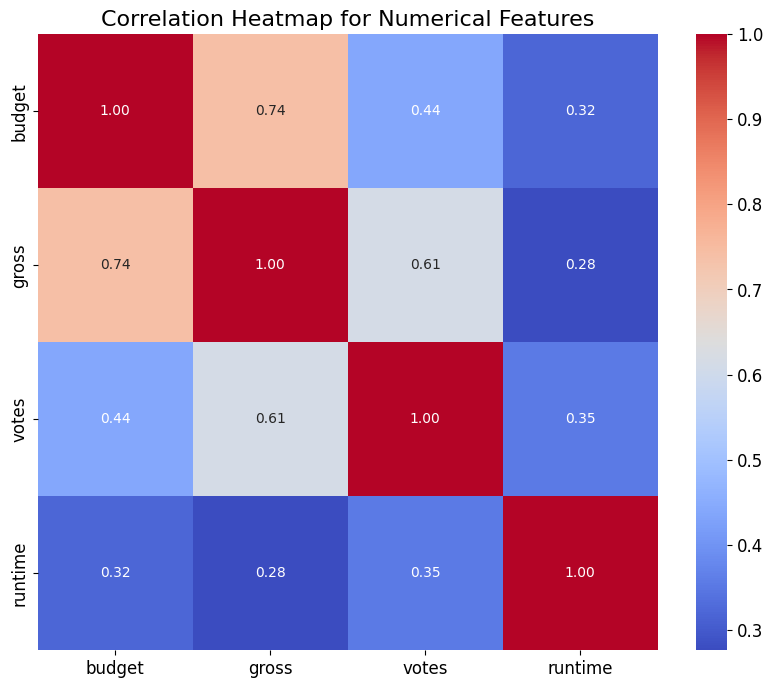

In [11]:
# Correlation matrix for Numerical Features

corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

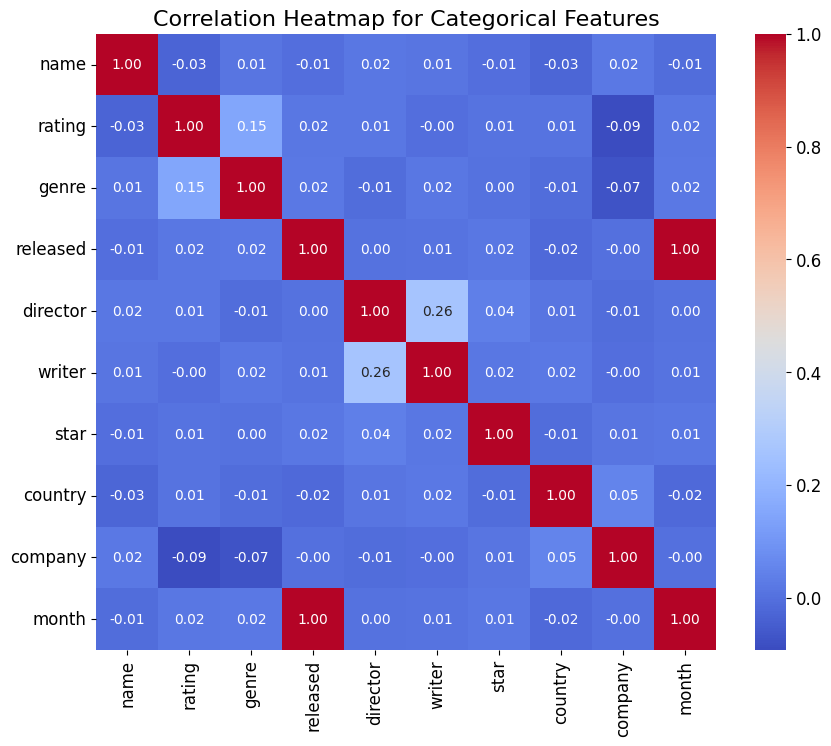

In [12]:
# Correlation Matrix for Categorical Features

# Convert categorical value to numeric value
categorical_cols = df.select_dtypes(include=['category','object']).columns.tolist()
df_catcodes = df[categorical_cols]
# for columns in categorical_cols:
#   df[columns] = [df[columns].astype('category').cat.codes
df_catcodes[categorical_cols] = df_catcodes[categorical_cols].apply(lambda cols:cols.astype('category').cat.codes)

# Correlation matrix
corr_matrix = df_catcodes[categorical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Categorical Features')
plt.show()

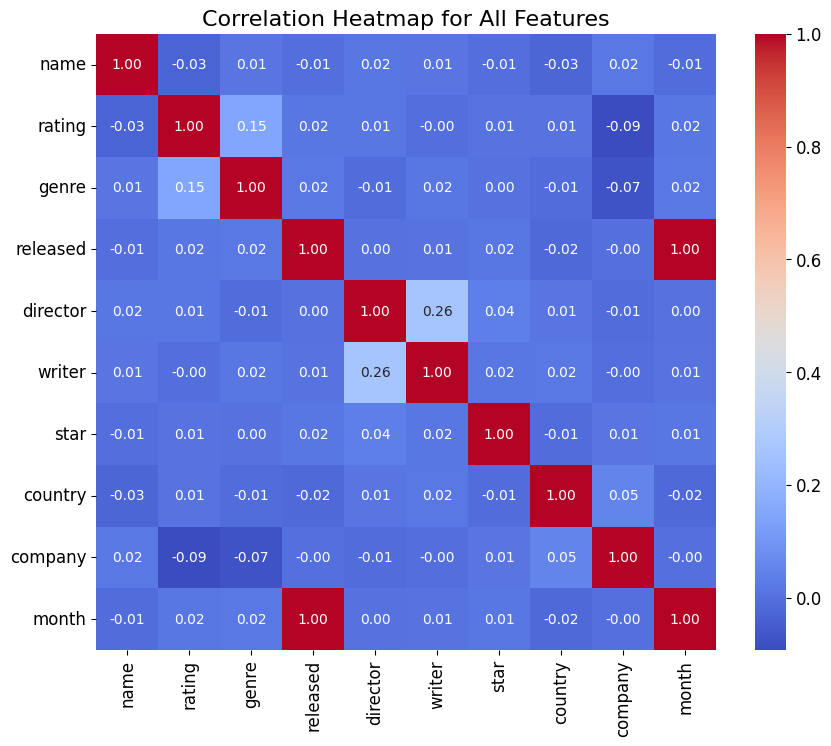

In [13]:
# Correlation Matrix of Categorical Features

# Convert all value to numeric value
df_copy = df.copy()
df_copy = df_copy.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)

# Correlation matrix
corr_matrix = df_copy[categorical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Features')
plt.show()

Trends Analysis : \
Identify the trends in gross revenue and average votes by years

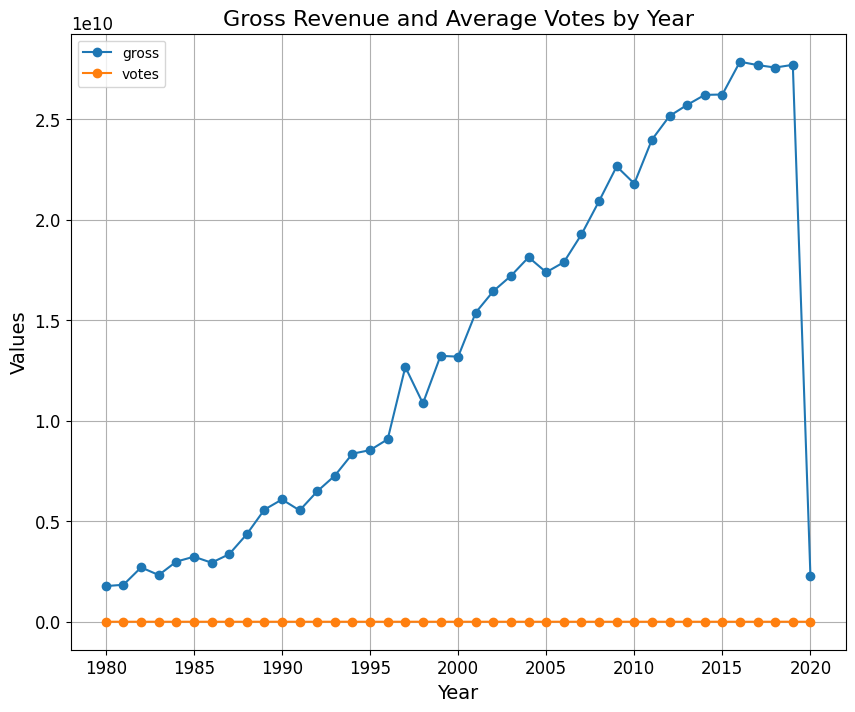

In [14]:
# Gross and Votes trends by year

movies_by_year = df.groupby('year').agg({'gross': 'sum', 'votes': 'mean'})
movies_by_year.plot(y=['gross', 'votes'], kind='line', marker='o')
plt.title('Gross Revenue and Average Votes by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.show()

Identify trends in movies production by years.

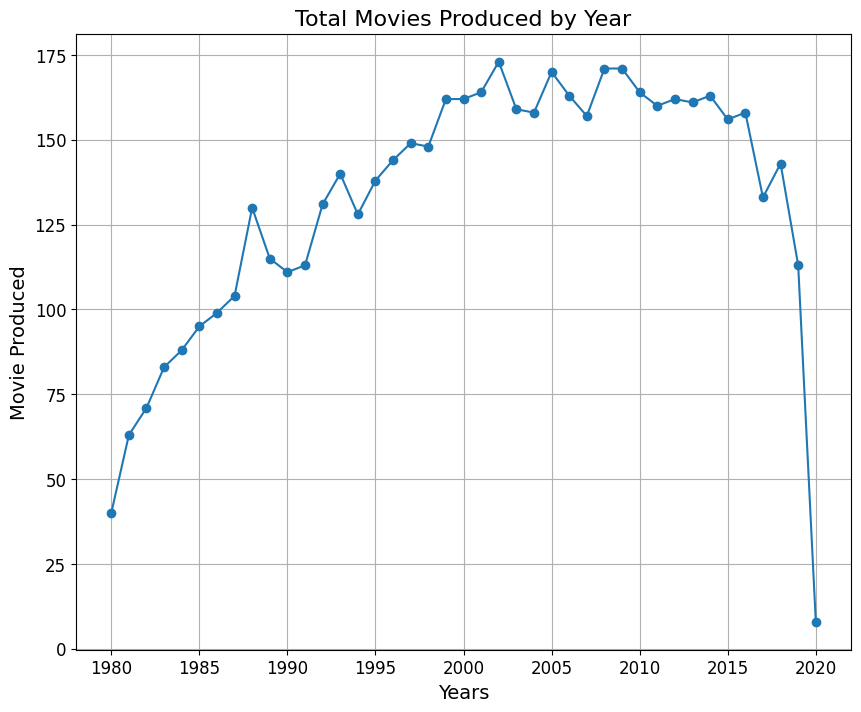

In [15]:
# Movies trends by years

df.groupby('year').size().plot(kind='line', marker='o')
plt.title('Total Movies Produced by Year')
plt.xlabel('Years')
plt.ylabel('Movie Produced')
plt.grid()
plt.show()

Performance Analysis : \
Identify gross revenue by top-performing genres

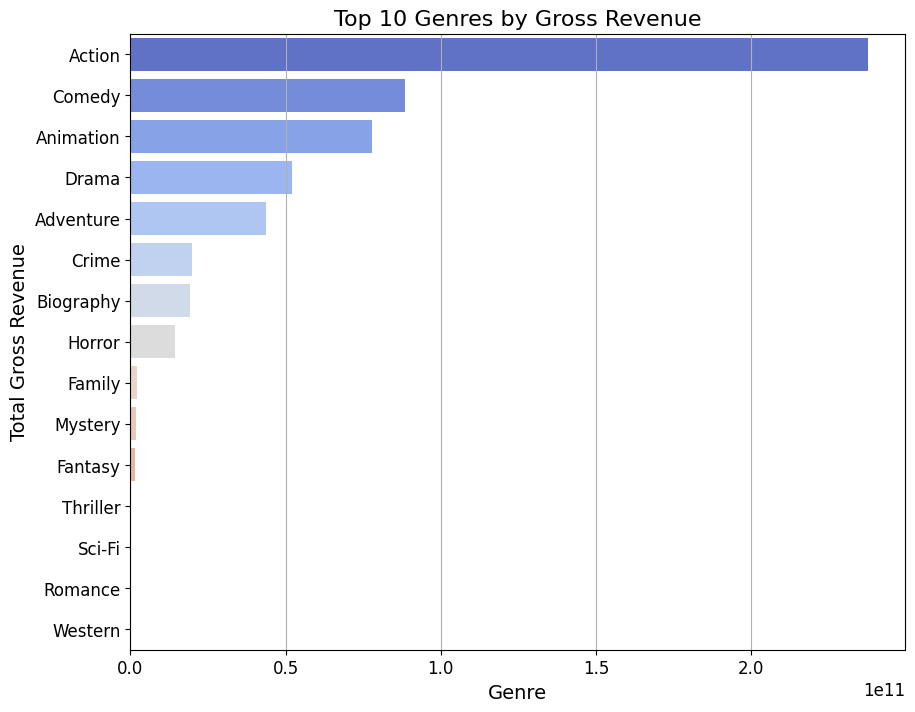

In [16]:
# Revenues by Genres

top_genres = df.groupby('genre')['gross'].sum().sort_values(ascending=False)
sns.barplot(top_genres, orient='h', palette='coolwarm')
plt.title('Top 10 Genres by Gross Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Gross Revenue')
plt.grid(axis='x')
plt.show()

Identify gross revenue by company

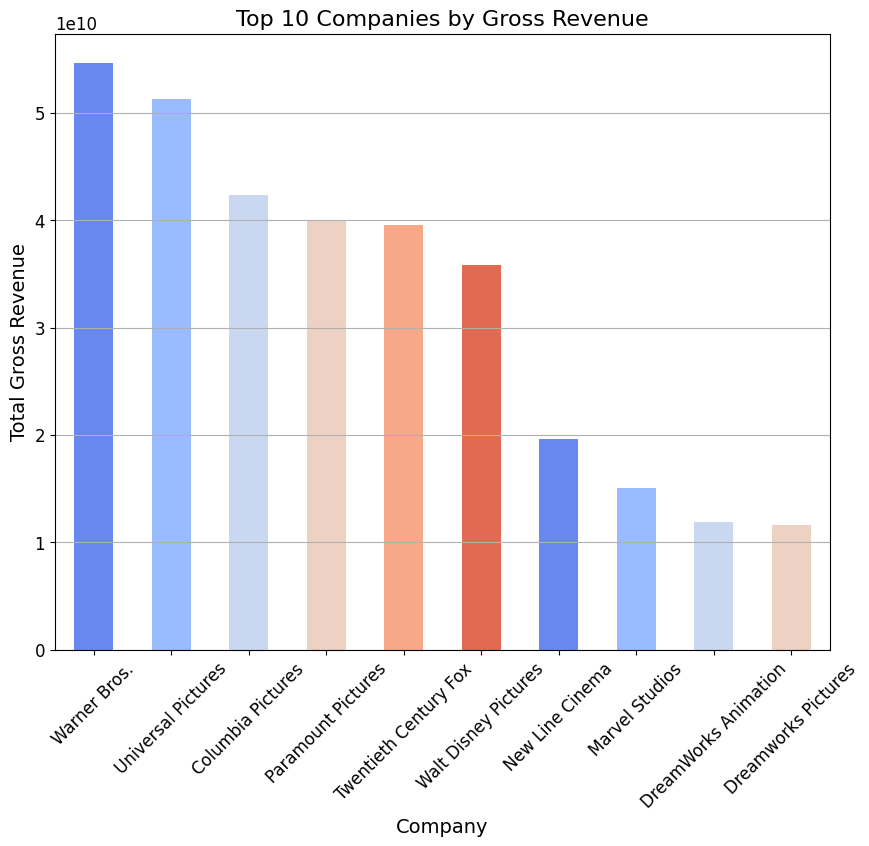

In [17]:
# Revenues by Company

top_companies = df.groupby('company')['gross'].sum().sort_values(ascending=False).head(10)
top_companies.plot(kind='bar', color=sns.color_palette('coolwarm'))
plt.title('Top 10 Companies by Gross Revenue')
plt.xlabel('Company')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Identify gross revenue by movies name

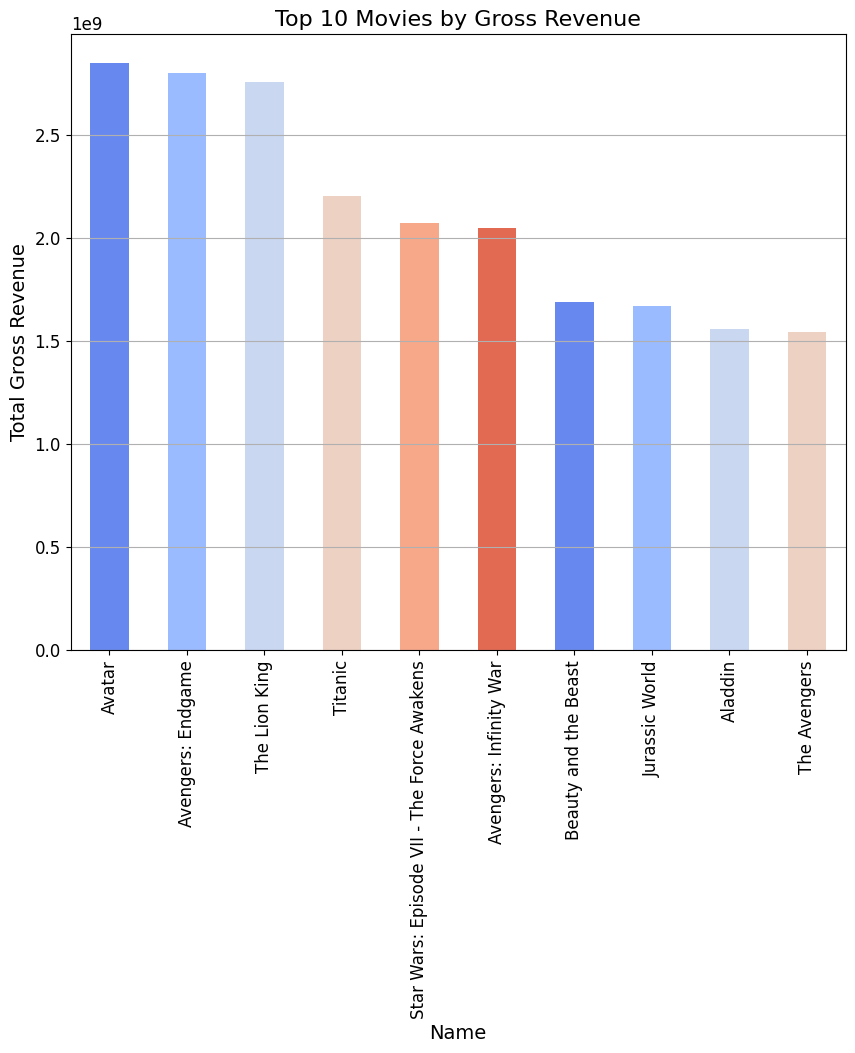

In [18]:
# Revenues by Movie

top_movies = df.groupby('name')['gross'].sum().sort_values(ascending=False).head(10)
top_movies.plot(kind='bar', color=sns.color_palette('coolwarm'))
plt.title('Top 10 Movies by Gross Revenue')
plt.xlabel('Name')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Identify gross revenue by director

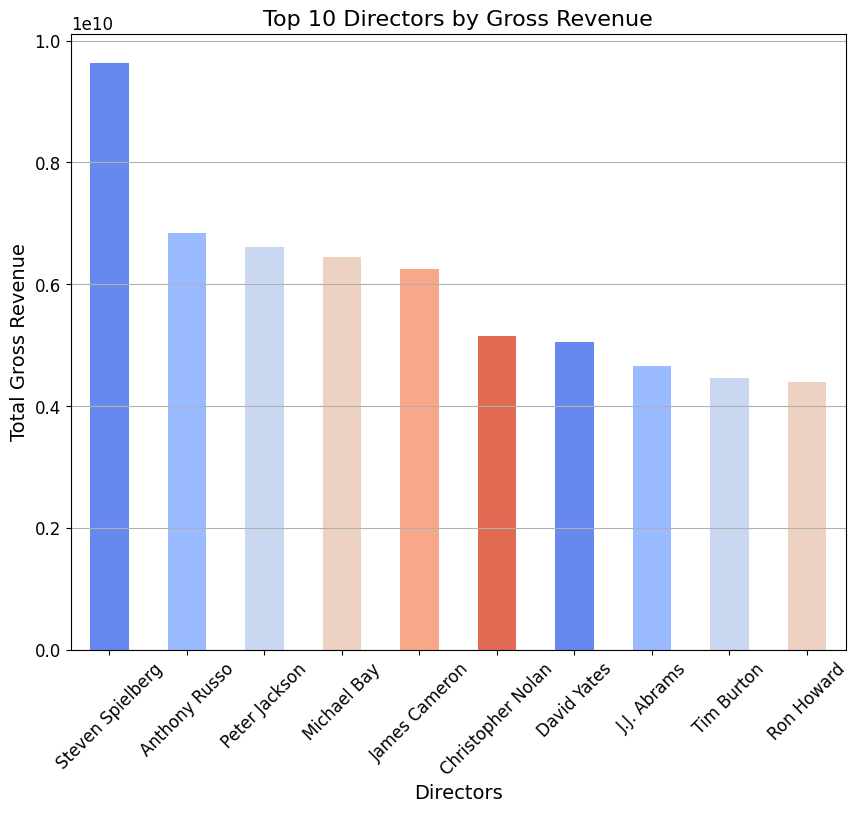

In [19]:
# Revenues by Director

top_director = df.groupby('director')['gross'].sum().sort_values(ascending=False).head(10)
top_director.plot(kind='bar', color=sns.color_palette('coolwarm'))
plt.title('Top 10 Directors by Gross Revenue')
plt.xlabel('Directors')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Identify gross revenue by star actor/actress

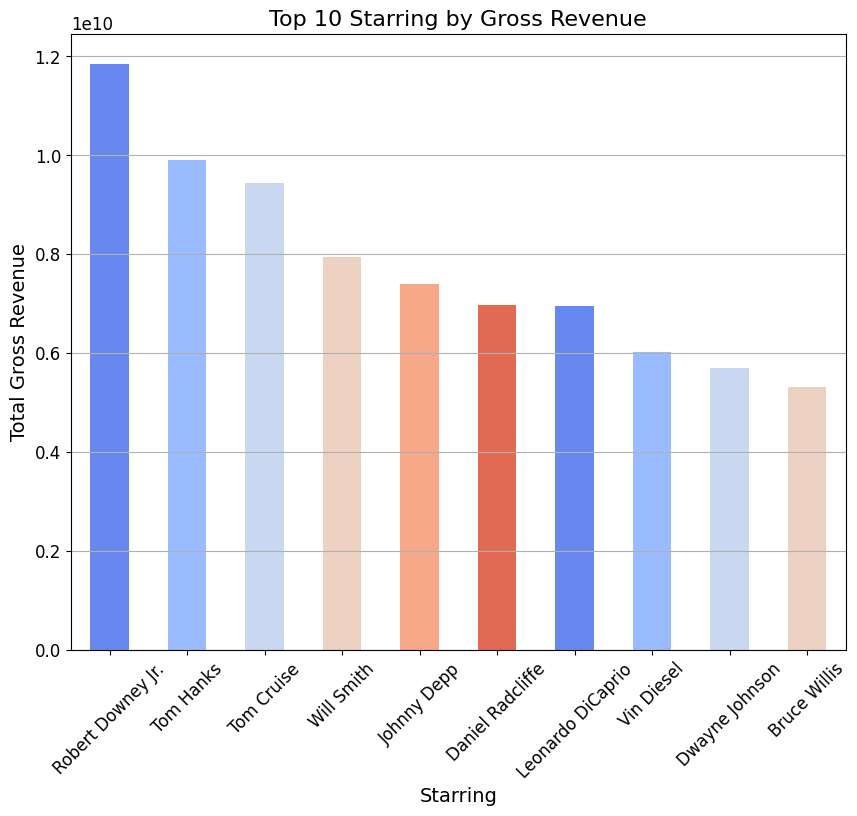

In [20]:
# Revenues by Star Actor/Actress

top_starring = df.groupby('star')['gross'].sum().sort_values(ascending=False).head(10)
top_starring.plot(kind='bar', color=sns.color_palette('coolwarm'))
plt.title('Top 10 Starring by Gross Revenue')
plt.xlabel('Starring')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### Advanced Analysis

Predictive Model

Estimate a movie's gross revenue based on its budget, runtime, and votes.

In [21]:
# Import necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
# Define features and target
features = df[['budget', 'votes', 'runtime']]
target = df['gross']

# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Filter on criteria (budget, votes or runtime)
features_pred = features[features['runtime']<100] [:10]

# Convert result to dataframe
features_predict = pd.DataFrame(model.predict(features_pred),
                                columns=['prediction_budget']).astype('int64')

In [ ]:
# Model Prediction and Evaluation
print(f'Predicted Budget for criteria :\n {features_pred} \n {features_predict}')

score = model.score(X_test, y_test)
print(f'Model R^2 Score: {score:.2f}')

Predicted Budget for criteria :
       budget   votes  runtime
3    3500000  221000       88
4    6000000  108000       98
5     550000  123000       95
18   1000000   66000       89
23  20000000   12000       96
33   5100000     604       97
36   4000000    4300       91
48  15000000    3100       94
50  10000000   22000       89
51   7000000    4500       95 
    prediction_budget
0           62891402
1           24570698
2           16834089
3             510531
4           28490429
5          -15648140
6          -14449783
7           12960654
8            8745710
9           -8273460
Model R^2 Score: 0.67


: 

##### Summary/Conclusion

- Movies production seems stagnant from *1993* to *2018*.
- The top-grossing genres are *Action* followed by *Comedy*, *Animation*, *Drama* and *Adventure*. 
- Companies like *Warner Bros*, *Universal Pictures* and *Columbia Pictures* dominate the movie industry.

- The predictive model achieves an R^2 score of 0.66